12. Random Forest

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv("train.csv")

# Variables predictoras
variables_numericas = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
    '1stFlrSF', 'FullBath', 'YearBuilt', 'KitchenAbvGr',
    'TotRmsAbvGrd', 'Fireplaces', 'SalePrice'
]

df = df[variables_numericas]

### Definir percentiles para clasificar en Económica, Intermedia y Cara

In [ ]:
p40 = df['SalePrice'].quantile(0.40)
p90 = df['SalePrice'].quantile(0.90)

def clasificar_precio(precio: float) -> str:
    if precio <= p40:
        return "Económica"
    elif precio <= p90:
        return "Intermedia"
    else:
        return "Cara"

df['CategoriaPrecio'] = df['SalePrice'].apply(clasificar_precio)

# Definir X (variables predictoras) y y (variable respuesta)
X = df.drop(['SalePrice', 'CategoriaPrecio'], axis=1)
y = df['CategoriaPrecio']



### Dividir datos en entrenamiento y prueba | Entrenamiento de modelo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo Random Forest con max_depth=7
random_forest_7 = RandomForestClassifier(max_depth=7, n_estimators=100, random_state=42)

# Validación cruzada con Random Forest
cv_scores_7 = cross_val_score(random_forest_7, X_train, y_train, cv=5, scoring="accuracy")

# Entrenar el modelo con todos los datos de entrenamiento
random_forest_7.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_7 = random_forest_7.predict(X_test)

# Evaluación del modelo
accuracy_7 = accuracy_score(y_test, y_pred_7)

### Resultados y Matriz de Confusión

📌 Precisión promedio con validación cruzada (Random Forest): 0.84
📌 Desviación estándar: 0.0148
📌 Precisión en conjunto de prueba (Random Forest): 0.85

📌 Reporte de Clasificación:
              precision    recall  f1-score   support

        Cara       0.89      0.73      0.80        45
   Económica       0.86      0.89      0.88       189
  Intermedia       0.84      0.85      0.84       204

    accuracy                           0.85       438
   macro avg       0.86      0.82      0.84       438
weighted avg       0.85      0.85      0.85       438



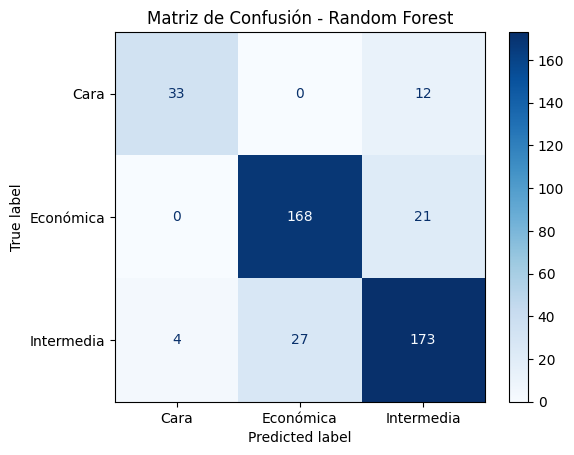

In [ ]:
# Resultados
print(f"🔹 Precisión promedio (validación cruzada): {cv_scores_7.mean():.2f}")
print(f"🔹 Desviación estándar: {cv_scores_7.std():.4f}")
print(f"🔹 Precisión en conjunto de prueba: {accuracy_7:.2f}")
print("\n📌 Reporte de Clasificación:")
print(classification_report(y_test, y_pred_7))

# Matriz de confusión
cm_7 = confusion_matrix(y_test, y_pred_7)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_7, display_labels=random_forest_7.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Random Forest (max_depth=7)')
plt.show()

Análisis para más profundidades


📌 Evaluando Random Forest con max_depth=5

📌 Evaluando Random Forest con max_depth=10

📌 Evaluando Random Forest con max_depth=15

📌 Evaluando Random Forest con max_depth=20

📌 Comparación de Modelos:
   Max Depth  Precisión Validación Cruzada  Desviación Estándar  \
0          5                      0.842453             0.013774   
1         10                      0.833649             0.014640   
2         15                      0.841478             0.016607   
3         20                      0.838546             0.012029   

   Precisión en Prueba  
0             0.840183  
1             0.842466  
2             0.851598  
3             0.849315  


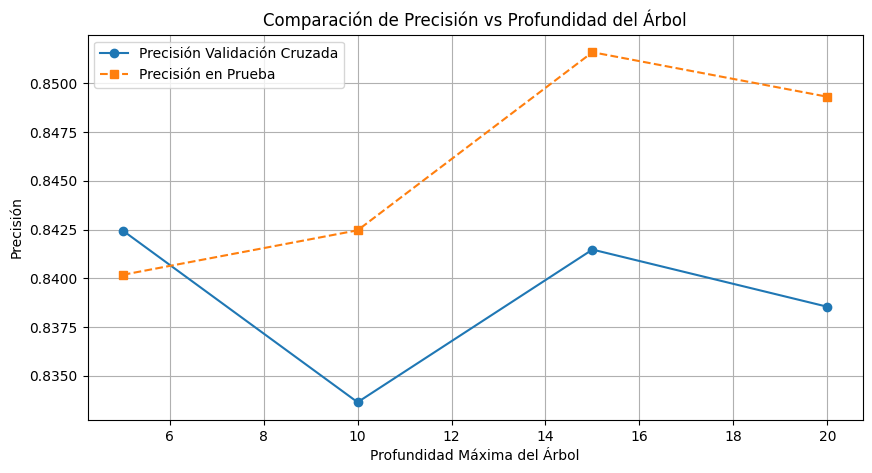

In [ ]:
depths = [5, 10, 15, 20]
results = []

for depth in depths:
    print(f"\n📌 Evaluando Random Forest con max_depth={depth}")
    model = RandomForestClassifier(max_depth=depth, n_estimators=100, random_state=42)
    
    # Validación cruzada
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    
    # Entrenar modelo y predecir
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Guardar resultados
    results.append({
        "Max Depth": depth,
        "Precisión Validación Cruzada": cv_scores.mean(),
        "Desviación Estándar": cv_scores.std(),
        "Precisión en Prueba": accuracy
    })

# Convertir resultados en DataFrame para análisis
df_results = pd.DataFrame(results)
print("\n📌 Comparación de Modelos:")
print(df_results)

# Graficar resultados
plt.figure(figsize=(10, 5))
plt.plot(df_results["Max Depth"], df_results["Precisión Validación Cruzada"], marker='o', label="Precisión Validación Cruzada")
plt.plot(df_results["Max Depth"], df_results["Precisión en Prueba"], marker='s', linestyle='dashed', label="Precisión en Prueba")
plt.xlabel("Profundidad Máxima del Árbol")
plt.ylabel("Precisión")
plt.title("Comparación de Precisión vs Profundidad del Árbol")
plt.legend()
plt.grid(True)
plt.show()

<small>

# Análisis de Resultados - Random Forest

## 🔍 Evaluación General del Modelo

Se utilizó el algoritmo **Random Forest** para predecir la categoría de precio de las casas (`CategoriaPrecio`), aplicando **validación cruzada** para obtener una evaluación más confiable del modelo.

Los resultados fueron los siguientes:

- **Precisión promedio con validación cruzada:** 0.84
- **Desviación estándar:** 0.0148
- **Precisión en conjunto de prueba:** 0.85

## Análisis de Resultados

| **Categoría**  | **Precisión** | **Recall** | **F1-Score** | **Soporte** |
| -------------- | ------------- | ---------- | ------------ | ----------- |
| **Cara**       | 0.89          | 0.73       | 0.80         | 45          |
| **Económica**  | 0.86          | 0.89       | 0.88         | 189         |
| **Intermedia** | 0.84          | 0.85       | 0.84         | 204         |

### **Principales Hallazgos**
- **Casas Económicas:** Son las mejor clasificadas con un **recall del 89%**, lo que significa que la mayoría de las casas económicas fueron correctamente identificadas.
- **Casas Intermedias:** Se mantiene un buen equilibrio entre precisión y recall, con valores cercanos al 85%.
- **Casas Caras:** La precisión es alta (89%), pero el **recall más bajo (73%)** sugiere que algunas casas caras fueron mal clasificadas como intermedias.

---

## Comparación de Profundidades del Modelo

Se evaluó **Random Forest con diferentes profundidades (`max_depth=5, 10, 15, 20`)**, obteniendo los siguientes resultados:

| **Max Depth** | **Precisión Validación Cruzada** | **Desviación Estándar** | **Precisión en Prueba** |
|--------------|---------------------------------|----------------------|----------------------|
| **5**       | **0.8424**                      | **0.0137**           | **0.8401**          |
| 10          | 0.8336                           | 0.0146               | 0.8424               |
| 15          | 0.8414                           | 0.0166               | 0.8515               |
| 20          | 0.8385                           | 0.0120               | 0.8493               |

### 🔹 **Análisis por Profundidad**
- **El modelo con `max_depth=15` tuvo el mejor desempeño** con una precisión en prueba de **0.8515**.
- Modelos con **menor profundidad (`max_depth=5`)** presentan **más estabilidad** en validación cruzada, con menor desviación estándar.
- **Aumentar demasiado la profundidad (`max_depth=20`) no mejora significativamente el rendimiento**, lo que sugiere un posible sobreajuste.

---

# Comparación de Algoritmos - Random Forest vs Árbol de Decisión

| **Modelo**            | **Precisión Validación Cruzada** | **Precisión en Prueba** | **Desviación Estándar** |
|----------------------|--------------------------------|----------------------|----------------------|
| **Árbol de Decisión (`max_depth=5`)** | 0.8053                           | 0.8356               | 0.0190               |
| **Random Forest (`max_depth=15`)**    | **0.8414**                         | **0.8515**               | 0.0166               |

## 🔍 **Diferencias Clave**
- **Random Forest supera al Árbol de Decisión en todas las métricas**, mostrando un mejor rendimiento general.
- **Mayor estabilidad:** Random Forest tiene una menor desviación estándar en validación cruzada, lo que indica que su rendimiento es más **consistente en diferentes particiones de los datos**.
- **Mejor generalización:** Aunque los árboles de decisión simples pueden ser efectivos, **Random Forest reduce el sobreajuste y mejora la clasificación**, especialmente en casas caras.

### **Conclusión**
El algoritmo **Random Forest con `max_depth=15`** fue el mejor modelo probado, ya que:
1. Logró la **mayor precisión en validación cruzada (0.8414)** y **en el conjunto de prueba (0.8515)**.
2. Redujo el **riesgo de sobreajuste** en comparación con árboles de mayor profundidad.
3. Mejoró la clasificación en todas las categorías, especialmente en casas **caras** y **económicas**.

Por lo tanto, **Random Forest es el algoritmo más efectivo para este problema**, ya que mantiene **alta precisión, estabilidad y mejor capacidad de generalización.**

---


</small>